In [1]:
import pickle
import pandas as pd

all_results = pd.read_pickle("all_results.pkl")

In [9]:
models_to_test = all_results['model_name'].unique()
models_to_test

array(['google/gemma-2-9b-it', 'google/gemma-2-9b', 'google/gemma-2-2b',
       'google/gemma-2-2b-it'], dtype=object)

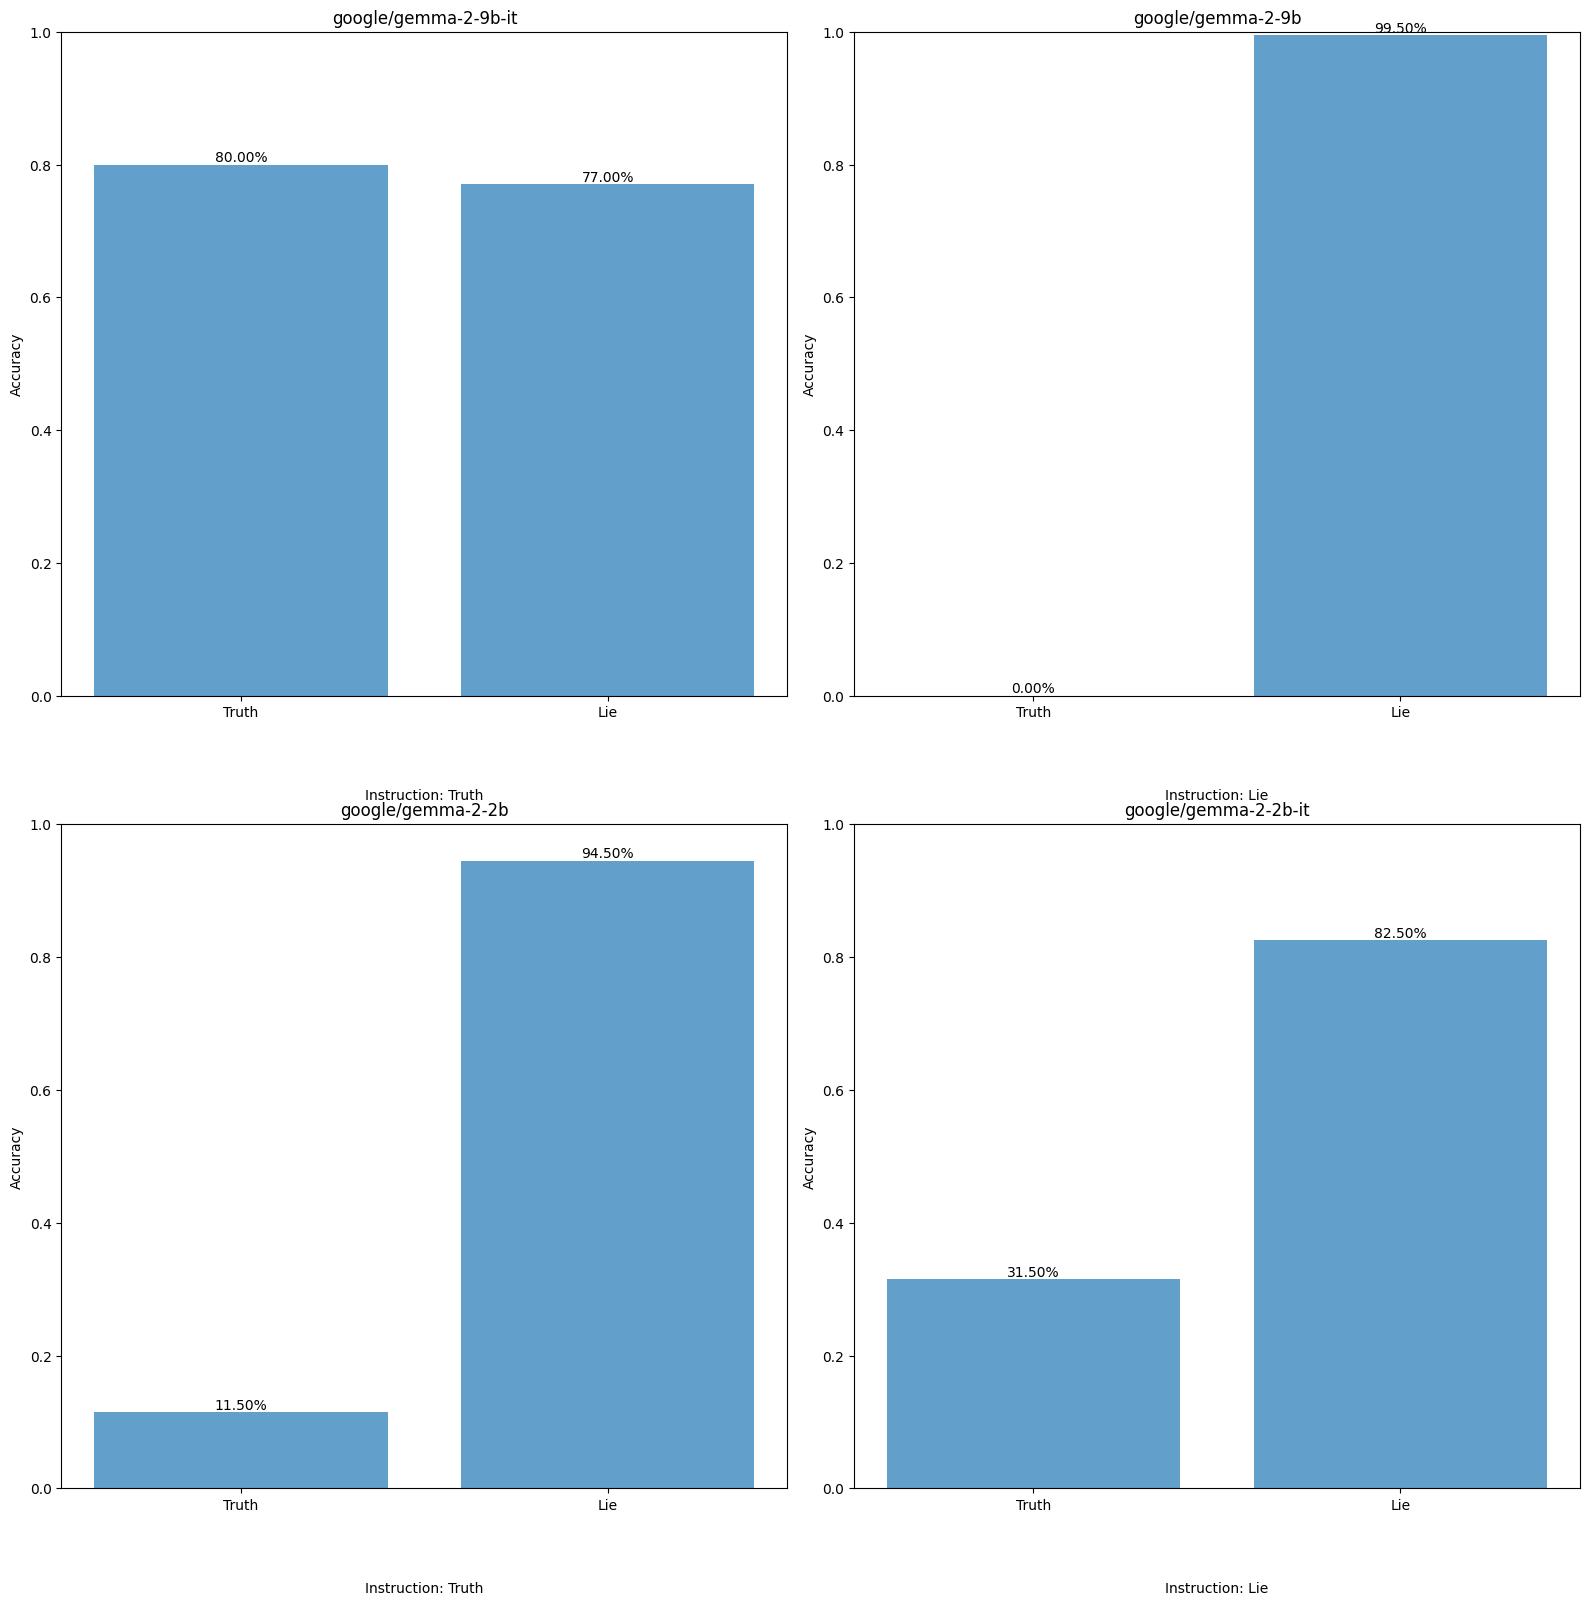

In [11]:
# Create subplots for each model
import matplotlib.pyplot as plt

num_models = len(models_to_test)
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
axs = axs.flatten()

for i, model in enumerate(models_to_test):
    model_data = all_results[all_results['model_name'] == model]
    true_accuracy = model_data[model_data['true_run']]['is_correct'].mean()
    false_accuracy = model_data[~model_data['true_run']]['is_correct'].mean()
    
    axs[i].bar(['Truth', 'Lie'], [true_accuracy, false_accuracy], alpha=0.7)
    axs[i].set_ylim(0, 1)
    axs[i].set_ylabel('Accuracy')
    axs[i].set_title(f'{model}')
    
    for j, acc in enumerate([true_accuracy, false_accuracy]):
        axs[i].text(j, acc, f'{acc:.2%}', ha='center', va='bottom')
    
    axs[i].text(0.5, -0.15, f'Instruction: {"Truth" if i % 2 == 0 else "Lie"}', 
                ha='center', va='center', transform=axs[i].transAxes)

plt.tight_layout()
plt.show()